# "Iris Flower Species Classification Using Feedforward Neural Network"

### 🔍 **Problem Statement:**

The goal is to develop a Feedforward Neural Network (FNN) model to accurately classify iris flowers into one of three species — *Setosa*, *Versicolor*, or *Virginica* — based on four input features: **sepal length**, **sepal width**, **petal length**, and **petal width**. The model will learn patterns in the data and predict the species of an iris flower based on these measurements.

---

### 🎯 **Objectives:**

1. **Data Preprocessing:**  
   - Load and explore the Iris dataset.  
   - Handle missing values if any and encode categorical labels.

2. **Model Development:**  
   - Design and implement a Feedforward Neural Network architecture suitable for multi-class classification.  
   - Use appropriate activation functions (e.g., ReLU in hidden layers, Softmax in the output layer).

3. **Training and Optimization:**  
   - Train the model using backpropagation and an optimizer (e.g., Adam).  
   - Use a loss function suitable for multi-class classification (e.g., categorical cross-entropy).  
   - Split data into training and testing sets to evaluate model performance.

4. **Evaluation:**  
   - Measure performance using accuracy, precision, recall, and F1-score.  
   - Plot training curves (loss and accuracy vs. epochs).

5. **Prediction:**  
   - Use the trained model to predict the species of new, unseen iris flower data.

---


## **1. Load Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## **2. Load Data**

In [ ]:
import os #Manually Delete Old Files Before re-uploading, delete any existing files with the same name to prevent renaming:

file_path = "iris.csv"
if os.path.exists(file_path):
    os.remove(file_path)

 #uploaded = files.upload()

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 5107 bytes


In [ ]:
import io
data=pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

## **3. Data Preprocessing**

### **3.1. Data Cleaning**

In [ ]:
data.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
data.drop(columns=["Id"], inplace=True)

In [ ]:
data.shape

(150, 5)

In [ ]:
data.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### **3.2. Handle Duplicates**

In [ ]:
duplicates = data.duplicated().sum()
duplicates

np.int64(3)

In [ ]:
duplicates = data[data.duplicated()]
duplicates

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
duplicates = data.duplicated().sum()
duplicates

np.int64(0)

### **3.3. Check inconsistencies and errors**

In [ ]:
# our data have no inconsistencies and errors

### **3.4. Encoding**

In [ ]:
data.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [ ]:
data.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,int64


In [ ]:
data['Species'].value_counts()

,count
Species,
1,50
2,49
0,48


### **3.5. Handle Outliers**

In [ ]:
# Calculate outlier percentage for all features in the dataset using IQR method
def calculate_outlier_percentages(df):
    outlier_percentages = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentages[col] = len(outliers) / len(df) * 100  # Percentage of outliers
    return outlier_percentages

outlier_percentages_all = calculate_outlier_percentages(data)
outlier_percentages_all

{'SepalLengthCm': 0.0,
 'SepalWidthCm': 2.7210884353741496,
 'PetalLengthCm': 0.0,
 'PetalWidthCm': 0.0,
 'Species': 0.0}

In [ ]:
# iris dataset clean and well-balanced dataset, so outlier removal is usually not required.
# If the dataset is small and clean (like the Iris dataset), outliers may not have a big effect.
# If you standardize or normalize your data (which you already do with StandardScaler), the effect of outliers can be reduced.



### **3.6. EDA Visualization**

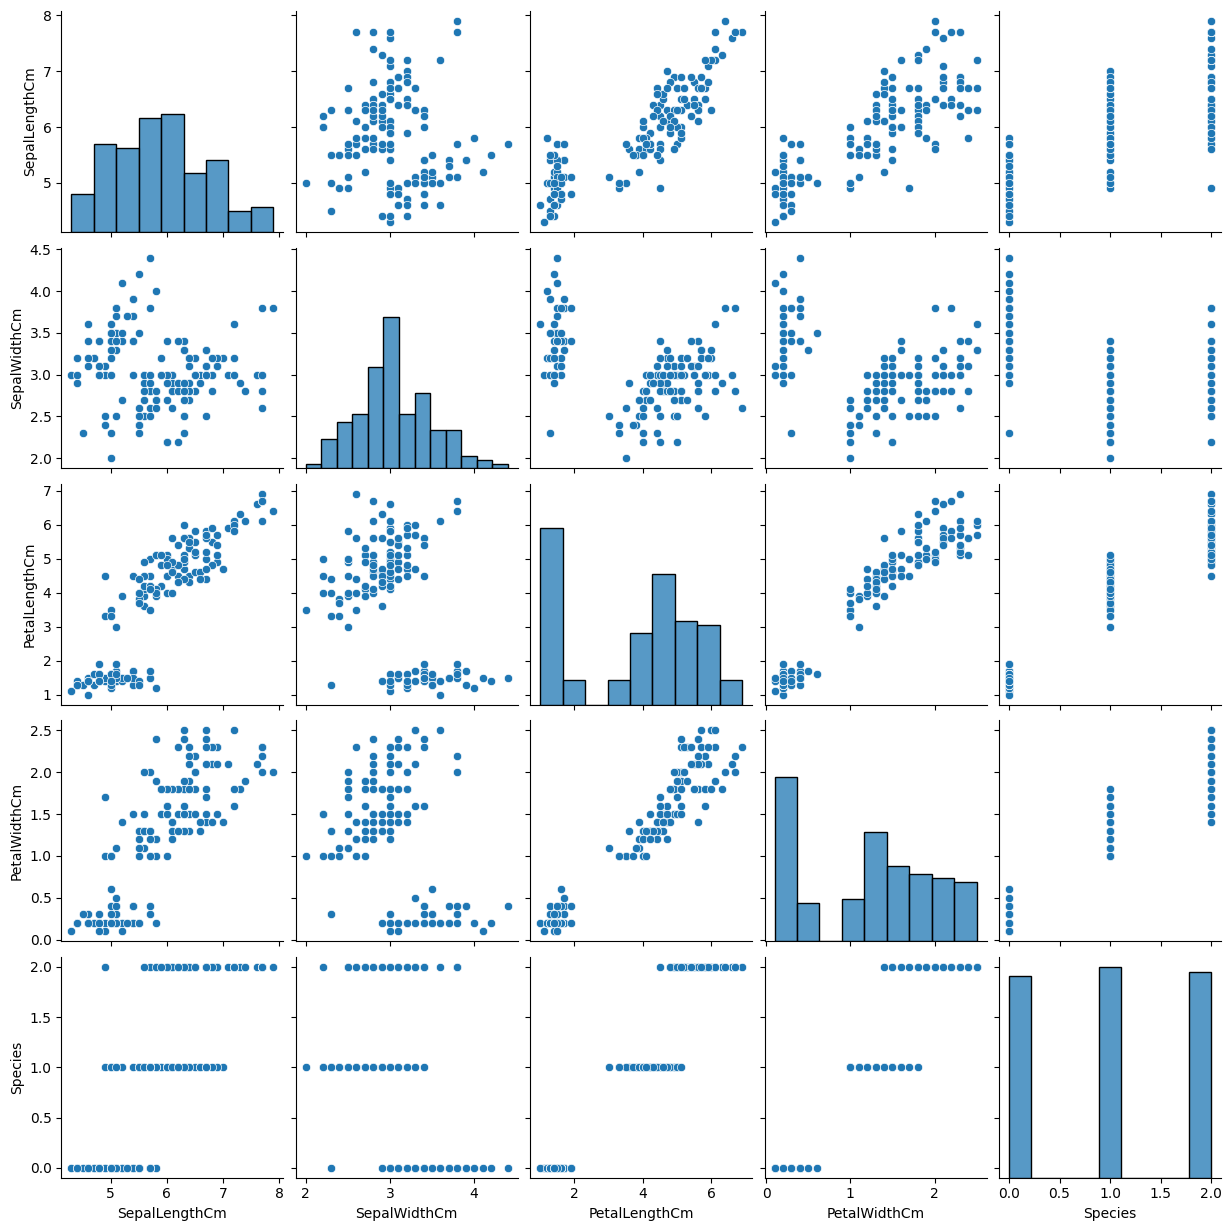

In [ ]:
sns.pairplot(data)
plt.show()

## **4. SCALING**

In [ ]:
data.shape

(147, 5)

In [ ]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [ ]:
x = data.drop(columns="Species")
y = data['Species']

In [ ]:
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

In [ ]:
# Ensure x_scaled remains a DataFrame
# x_scaled is need in dataframe because in correlation .corr is work with dataframe, and x_scaled is a numpay array.
X = pd.DataFrame(x_scaled, columns=data.drop(columns=['Species']).columns)

In [ ]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357


## **5. Feature Selection**

In [ ]:
# in this dataset no need to Feature selection

## **6. Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# Define the model
model = Sequential()

# Input layer + Hidden Layer 1
model.add(Dense(units=10, input_shape=(4,), activation='relu'))

# Hidden Layer 2
model.add(Dense(units=8, activation='relu'))

# Output Layer (3 classes for Iris species)
model.add(Dense(units=3, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
'''
#  your updated Keras model code using the modern, cleaner approach (with keras.Input and functional-like style inside Sequential)
# — this is more consistent with current best practices:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
# Define the model using the updated Input layer
model = Sequential([
    Input(shape=(4,)),                     # Input layer
    Dense(10, activation='relu'),         # Hidden Layer 1
    Dense(8, activation='relu'),          # Hidden Layer 2
    Dense(3, activation='softmax')        # Output Layer (3 classes)
])

or

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
'''

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9435 - loss: 0.1016 - val_accuracy: 0.9667 - val_loss: 0.0633
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9661 - loss: 0.0838 - val_accuracy: 0.9667 - val_loss: 0.0616
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9752 - loss: 0.0669 - val_accuracy: 0.9667 - val_loss: 0.0609
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9712 - loss: 0.0767 - val_accuracy: 0.9667 - val_loss: 0.0611
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9615 - loss: 0.0913 - val_accuracy: 0.9667 - val_loss: 0.0581
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9623 - loss: 0.0890 - val_accuracy: 1.0000 - val_loss: 0.0563
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9436 - loss: 0.0989 - val_accuracy: 0.9667 - val_loss: 0.0566
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9786 - loss: 0.0719 - val_accuracy: 0.9667 - 

In [ ]:
# Predict class probabilities for the test set
y_pred = model.predict(x_test)

# Convert the predicted probabilities into the class with the highest probability
y_pred_classes = y_pred.argmax(axis=1)  # Get the index of the max probability for each prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
y_pred.shape

(30, 3)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)*100
print(f'Accuracy: {accuracy}')


Accuracy: 96.66666666666667


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_classes))
print(confusion_matrix(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


In [ ]:
(11+10+8)/30

0.9666666666666667